In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

D:\documents\anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
sns.set()
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df["Exited"]
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

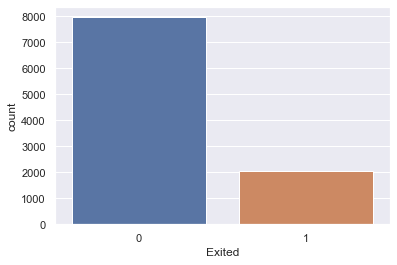

In [4]:
sns.countplot(x=y);

In [5]:
ss=StandardScaler()
x_scaler=ss.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=0)

In [6]:
#Let us create the Neural Network
classifier = Sequential()
classifier.add(Dense(6, activation = 'relu', input_shape = (x_train.shape[1], )))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(x_train, y_train, epochs = 200, validation_split = 0.1)

Epoch 1/200
211/211 [==============================] - 4s 4ms/step - loss: 0.6075 - accuracy: 0.7074 - val_loss: 0.5189 - val_accuracy: 0.7960
Epoch 2/200
211/211 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7935 - val_loss: 0.4773 - val_accuracy: 0.7960
Epoch 3/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7919 - val_loss: 0.4564 - val_accuracy: 0.7960
Epoch 4/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4637 - accuracy: 0.7939 - val_loss: 0.4419 - val_accuracy: 0.7960
Epoch 5/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7954 - val_loss: 0.4325 - val_accuracy: 0.7960
Epoch 6/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.7960 - val_loss: 0.4253 - val_accuracy: 0.7960
Epoch 7/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.7956 - val_loss: 0.4211 - val_accuracy: 0.7960

Epoch 58/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8433 - val_loss: 0.3597 - val_accuracy: 0.8480
Epoch 59/200
211/211 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8453 - val_loss: 0.3600 - val_accuracy: 0.8480
Epoch 60/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8473 - val_loss: 0.3602 - val_accuracy: 0.8493
Epoch 61/200
211/211 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8440 - val_loss: 0.3612 - val_accuracy: 0.8480
Epoch 62/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8440 - val_loss: 0.3597 - val_accuracy: 0.8467
Epoch 63/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8480 - val_loss: 0.3602 - val_accuracy: 0.8467
Epoch 64/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8439 - val_loss: 0.3600 - val_accuracy:

Epoch 115/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8456 - val_loss: 0.3568 - val_accuracy: 0.8467
Epoch 116/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8455 - val_loss: 0.3581 - val_accuracy: 0.8440
Epoch 117/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8452 - val_loss: 0.3584 - val_accuracy: 0.8453
Epoch 118/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8471 - val_loss: 0.3582 - val_accuracy: 0.8440
Epoch 119/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8434 - val_loss: 0.3579 - val_accuracy: 0.8467
Epoch 120/200
211/211 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8465 - val_loss: 0.3584 - val_accuracy: 0.8413
Epoch 121/200
211/211 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8452 - val_loss: 0.3586 - val_ac

In [8]:
y_pred = classifier.predict(x_test)
print(y_pred[:5])

79/79 [==============================] - 0s 1ms/step
[[0.15344611]
 [0.4056242 ]
 [0.23459236]
 [0.14348722]
 [0.14292598]]


In [9]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1925   66]
 [ 298  211]]


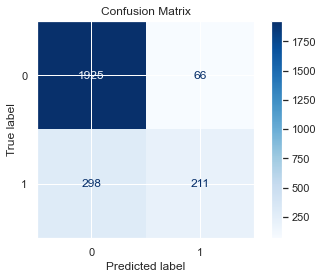

In [12]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Update display_labels as necessary
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [13]:
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')
print((cm[0][0]+cm[1][1])*100/len(y_test),"accuracy is following")

85.44 % of data was classified correctly
85.44 accuracy is following


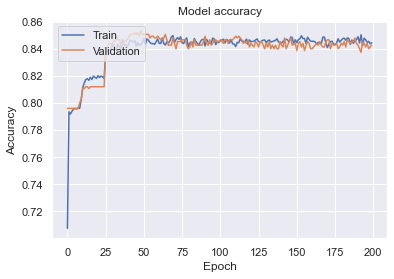

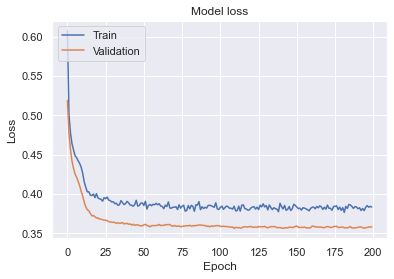

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


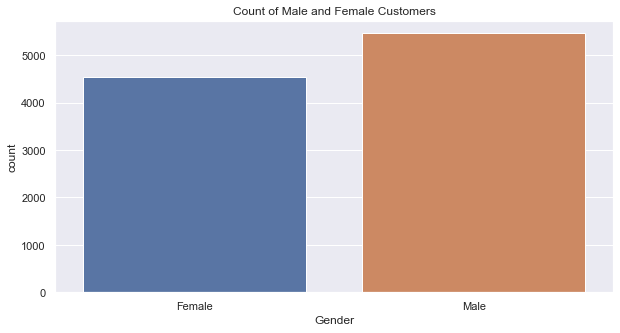

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Count of Male and Female Customers')
plt.show()


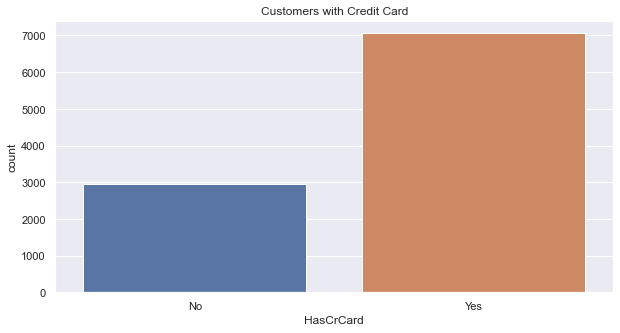

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='HasCrCard', data=df)
plt.title('Customers with Credit Card')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


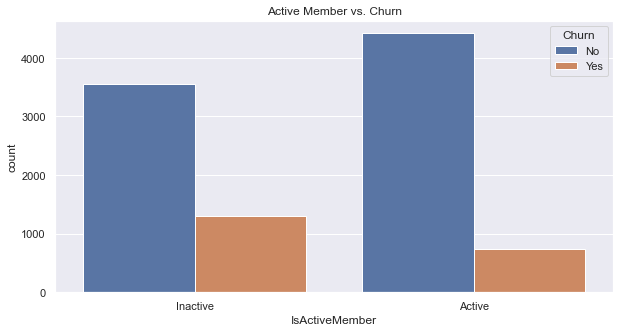

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Active Member vs. Churn')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


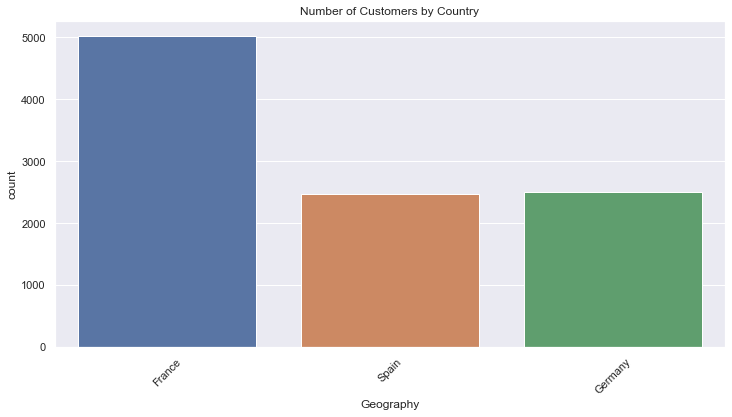

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Geography')
plt.title('Number of Customers by Country')
plt.xticks(rotation=45)
plt.show()


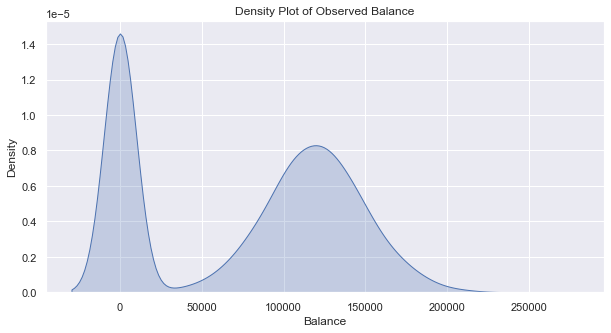

In [19]:
#dendity plots 
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Balance'], fill=True)
plt.title('Density Plot of Observed Balance')
plt.xlabel('Balance')
plt.show()


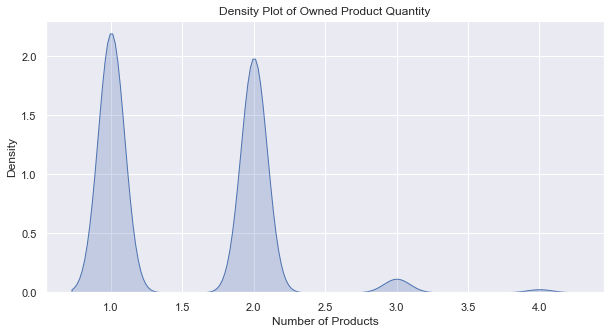

In [20]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['NumOfProducts'], fill=True)
plt.title('Density Plot of Owned Product Quantity')
plt.xlabel('Number of Products')
plt.show()


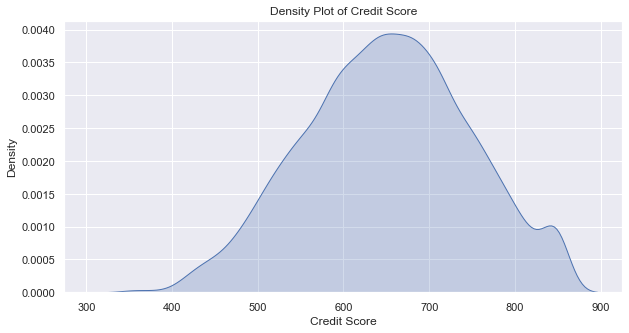

In [21]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['CreditScore'], fill=True)
plt.title('Density Plot of Credit Score')
plt.xlabel('Credit Score')
plt.show()


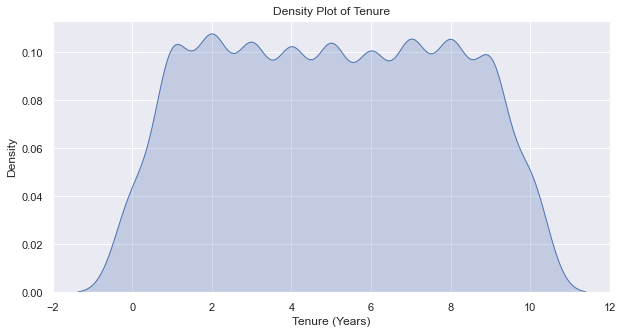

In [22]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Tenure'], fill=True)
plt.title('Density Plot of Tenure')
plt.xlabel('Tenure (Years)')
plt.show()


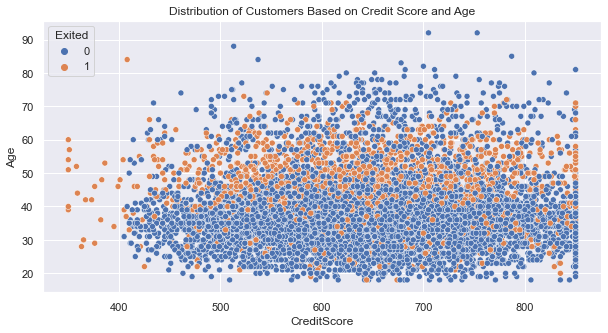

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='CreditScore', y='Age', hue='Exited')
plt.title('Distribution of Customers Based on Credit Score and Age')
plt.show()


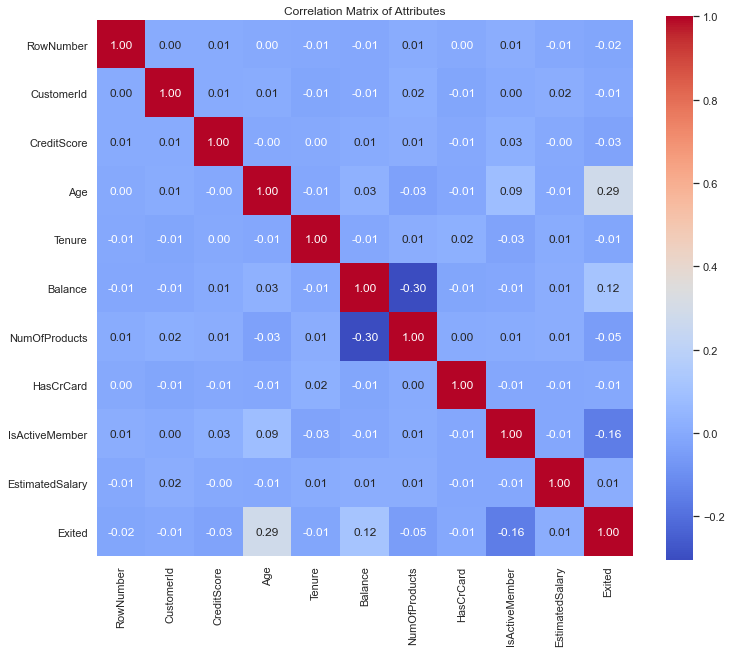

In [24]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Attributes')
plt.show()
